## Diabetes Database - ML prediction Model


In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("diabetes_data.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes['Outcome'].value_counts()

Outcome
0    499
1    268
Name: count, dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
%matplotlib inline 

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

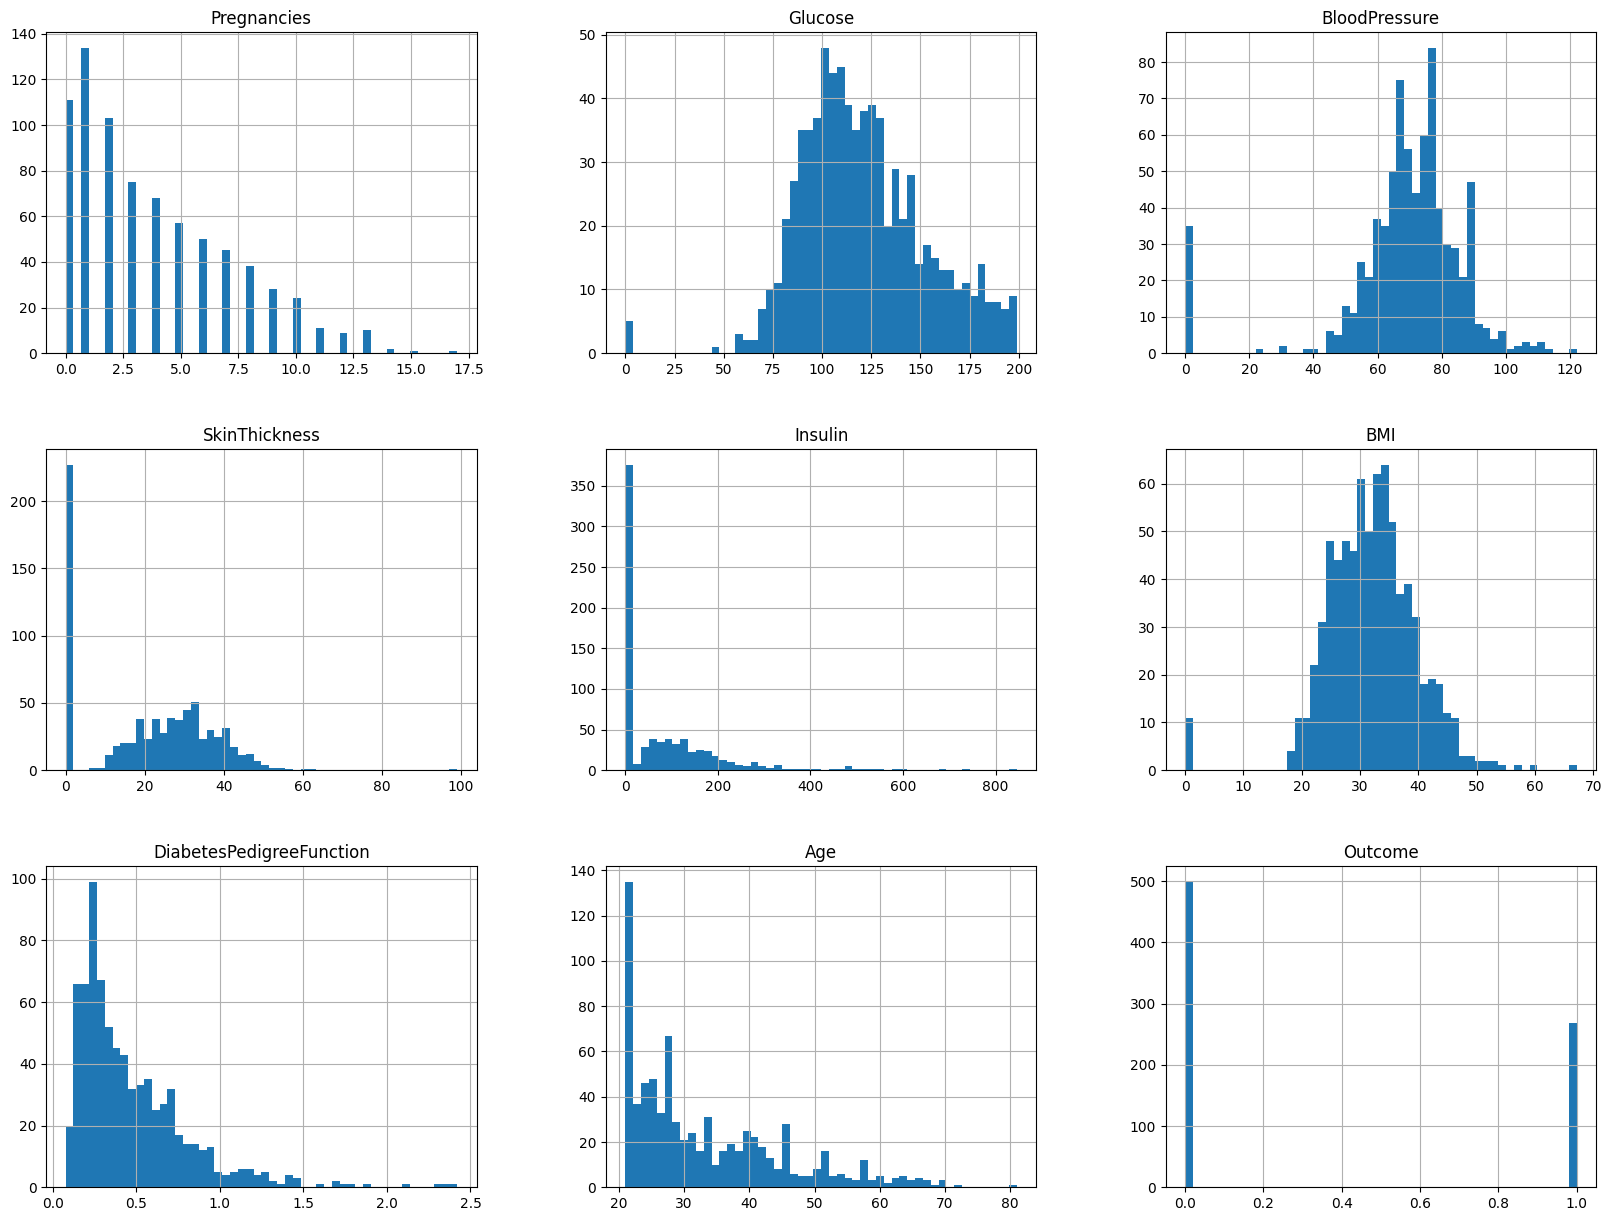

In [9]:
diabetes.hist(bins=50, figsize=(20, 15))

## Train-test splitting


In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(diabetes, 0.2)

[667 324 623 689 521 204  97 336 567 148 497 212 199 265 613 356 500 456
 706 213 619 543  86 208 281 209 383 638 328 436 120 363 424 300  67 338
 578  66 581  78 451 603  30 634  33  31  39  77 299 486 628 396 501 450
 620 234 361 429 691 532 753 763 518 254 479 211 210  84 239 417  54 719
 511 109 586 362 733 395 420  10 192 483 174 512 181 747 155 309  65 331
 137 350  81 467 404 645 250 660 220  76 547 290  72 244 393 572  63 599
 658 314 118 685  49 377 602 604 227 168 744   7 196 275  23 382 101 762
 426 259 193 697   2 215 381 611 605 713 734 690 409 616  79 522 432 485
 676 133 218  55 724 355 533 344 296 720  60 554 346 294 231 340 534 306
 717  90 607 235 158  69 260 131  44  70 264 672 286 639 135 412 165 164
  28 375 710 490 292 136 580 487 319 440   6 593 357  73 352 594 145 371
 291 132 693 405 718 394  41 759 108 482  56 323 684 748 571 750  24 464
 247 723 351 327 110  82  51 448 588 702 618 198 537 329 302 334 139 631
 648  18 726 140 326 266 523  83  61 446 473  29 33

In [12]:
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}\n")

Rows in train set: 614 
Rows in test set: 153



In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(diabetes, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 613
Rows in test set: 154



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(diabetes, diabetes['Outcome']):
    strat_train_set = diabetes.loc[train_index]
    strat_test_set = diabetes.loc[test_index]

In [15]:
strat_test_set['Outcome'].value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [16]:
strat_train_set['Outcome'].value_counts()

Outcome
0    399
1    214
Name: count, dtype: int64

In [17]:
100/54


1.8518518518518519

In [18]:
399/214

1.8644859813084111

In [19]:
diabetes= strat_train_set.copy()

In [20]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,3.823817,120.908646,69.662316,20.822186,78.872757,31.984176,0.477240,33.536705,0.349103
std,3.331120,31.583039,18.497178,15.905646,107.745131,7.837243,0.328993,11.944207,0.477076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.246000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.000000,32.300000,0.385000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.400000,0.637000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000,1.000000


## Looking for Correlations

In [21]:
corr_matrix = diabetes.corr()

In [22]:
corr_matrix['Insulin'].sort_values(ascending=False)

Insulin                     1.000000
SkinThickness               0.471518
Glucose                     0.345314
DiabetesPedigreeFunction    0.234594
BMI                         0.200519
Outcome                     0.162985
BloodPressure               0.080702
Age                        -0.035182
Pregnancies                -0.059228
Name: Insulin, dtype: float64

array([[<Axes: xlabel='Insulin', ylabel='Insulin'>,
        <Axes: xlabel='Glucose', ylabel='Insulin'>,
        <Axes: xlabel='BloodPressure', ylabel='Insulin'>,
        <Axes: xlabel='Pregnancies', ylabel='Insulin'>,
        <Axes: xlabel='Outcome', ylabel='Insulin'>],
       [<Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Outcome', ylabel='Glucose'>],
       [<Axes: xlabel='Insulin', ylabel='BloodPressure'>,
        <Axes: xlabel='Glucose', ylabel='BloodPressure'>,
        <Axes: xlabel='BloodPressure', ylabel='BloodPressure'>,
        <Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel='Outcome', ylabel='BloodPressure'>],
       [<Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel

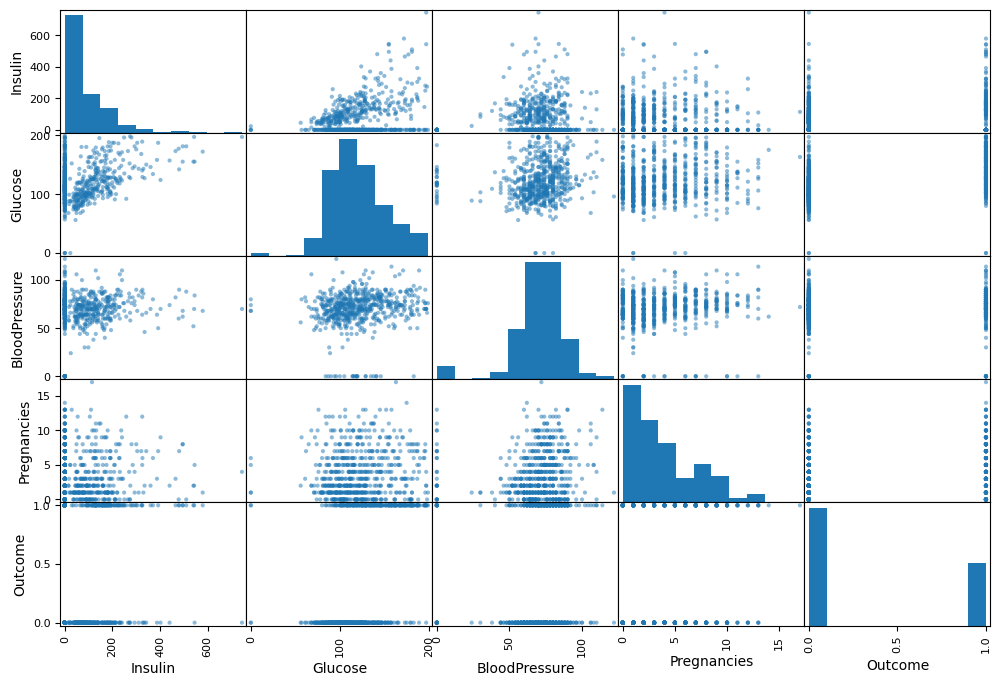

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["Insulin", "Glucose", "BloodPressure", "Pregnancies", "Outcome"]
scatter_matrix(diabetes[attributes], figsize = (12,8))

<Axes: xlabel='Glucose', ylabel='Insulin'>

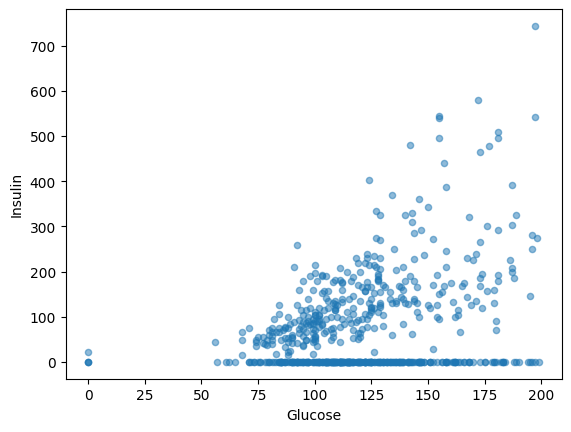

In [24]:
diabetes.plot(kind="scatter" , y= "Insulin", x= "Glucose", alpha=0.5)

In [25]:
diabetes["PregAge"]= diabetes["Pregnancies"]/diabetes["Age"]

In [26]:
corr_matrix = diabetes.corr()

In [27]:
corr_matrix['Insulin'].sort_values(ascending=False)

Insulin                     1.000000
SkinThickness               0.471518
Glucose                     0.345314
DiabetesPedigreeFunction    0.234594
BMI                         0.200519
Outcome                     0.162985
BloodPressure               0.080702
Age                        -0.035182
Pregnancies                -0.059228
PregAge                    -0.081712
Name: Insulin, dtype: float64

<Axes: xlabel='PregAge', ylabel='Insulin'>

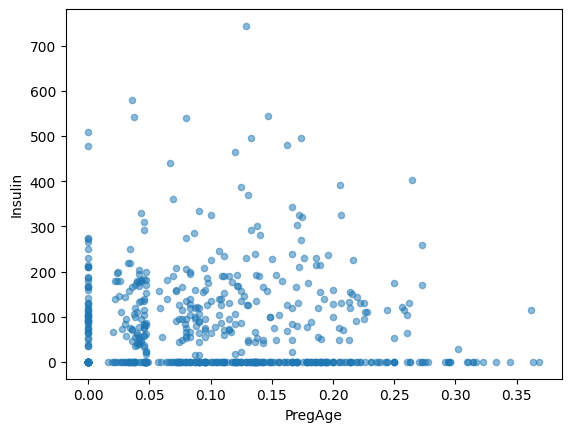

In [28]:
diabetes.plot(kind="scatter" , x= "PregAge", y= "Insulin", alpha=0.5)

In [29]:
diabetes["PregAge"]

466    0.000000
369    0.022222
373    0.080000
549    0.108108
272    0.075000
         ...   
689    0.021739
431    0.078947
703    0.048780
542    0.178571
123    0.072464
Name: PregAge, Length: 613, dtype: float64

In [30]:
diabetes.shape

(613, 10)

In [31]:
diabetes = strat_train_set.drop("Outcome",axis=1)
diabetes_label = strat_train_set["Outcome"].copy()

## Missing Values Shapping


In [32]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(diabetes)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([  3.   , 117.   ,  72.   ,  23.   ,  42.   ,  32.3  ,   0.385,
        29.   ])

In [35]:
X = imputer.transform(diabetes)

In [36]:
diabetes_tr = pd.DataFrame(X, columns=diabetes.columns)

In [37]:
diabetes_tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,3.823817,120.908646,69.662316,20.822186,78.872757,31.984176,0.477240,33.536705
std,3.331120,31.583039,18.497178,15.905646,107.745131,7.837243,0.328993,11.944207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.246000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.000000,32.300000,0.385000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.400000,0.637000,41.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [39]:
diabetes_num_tr = my_pipeline.fit_transform(diabetes_tr)

In [40]:
diabetes_num_tr
diabetes_num_tr.shape
# it is a numpy array

(613, 8)

## Selecting the desired Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(diabetes_num_tr, diabetes_label)

DecisionTreeRegressor()

In [42]:
some_data = diabetes.iloc[:5]

In [43]:
some_label = diabetes_label.iloc[:5]

In [44]:
prepared_data = my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([0., 1., 0., 0., 0.])

In [46]:
list(some_label)

[0, 1, 0, 0, 0]

## Evaluating the Model

In [47]:
from sklearn.metrics import mean_squared_error
diabetes_predictions = model.predict(diabetes_num_tr)
lin_mse = mean_squared_error(diabetes_label, diabetes_predictions)
rmse = np.sqrt(lin_mse)

In [48]:
lin_mse
rmse

np.float64(0.0)

## Using better evaluation techniques - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, diabetes_num_tr, diabetes_label, scoring="neg_mean_squared_error", cv= 10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([0.60907121, 0.53881591, 0.62217102, 0.6005462 , 0.62725005,
       0.58673869, 0.6401844 , 0.62725005, 0.52790958, 0.62725005])

In [51]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [0.60907121 0.53881591 0.62217102 0.6005462  0.62725005 0.58673869
 0.6401844  0.62725005 0.52790958 0.62725005]
Mean:  0.6007187153129031
Standard deviation:  0.03678021112721273


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code 

## Saving The Model

In [53]:
from joblib import dump, load
dump(model, 'Diabetes.joblib') 

['Diabetes.joblib']

## Testing the model on test_data

In [54]:
X_test = strat_test_set.drop("Outcome", axis=1)
Y_test = strat_test_set["Outcome"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]


In [55]:
final_rmse

np.float64(0.5582905262390825)

In [56]:
prepared_data[0]

array([-1.14884488, -1.48646094, -0.95564527, -0.68095468, -0.39823395,
       -0.53431968, -0.63347845, -0.96667161])

## Using the model

In [57]:
from joblib import dump, load
import numpy as np
model = load('Diabetes.joblib') 
features = np.array([[1.14884488, 1.48646094, -0.95564527, 0.68095468, 0.39823395,
       0.53431968, 0.63347845, 0.96667161]])
model.predict(features)

array([1.])